Importando bibliotecas


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

Carregando os dados

In [40]:
df24 = pd.read_csv('survey_results_public.csv')
df23 = pd.read_csv('survey_results_public23.csv')
df22 = pd.read_csv('survey_results_public22.csv')
df21 = pd.read_csv('survey_results_public21.csv')



selecionando as colunas especificas 

In [41]:
# Ensure the cell below (CELL INDEX: 7) is executed before running this cell
df21 = df21[['DevType', 'LanguageHaveWorkedWith', 'WebframeHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
			 'ToolsTechHaveWorkedWith', 'YearsCodePro','LanguageWantToWorkWith', 'WebframeWantToWorkWith', 'DatabaseWantToWorkWith',
    'PlatformWantToWorkWith', 'ToolsTechWantToWorkWith','Employment']]
    
df22 = df22[['DevType', 'LanguageHaveWorkedWith', 'WebframeHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
			 'ToolsTechHaveWorkedWith', 'YearsCodePro','LanguageWantToWorkWith', 'WebframeWantToWorkWith', 'DatabaseWantToWorkWith',
    'PlatformWantToWorkWith', 'ToolsTechWantToWorkWith','Employment']]
df23 = df23[['DevType', 'LanguageHaveWorkedWith', 'WebframeHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
			 'ToolsTechHaveWorkedWith', 'YearsCodePro','LanguageWantToWorkWith', 'WebframeWantToWorkWith', 'DatabaseWantToWorkWith',
    'PlatformWantToWorkWith', 'ToolsTechWantToWorkWith','Employment']]
df24 = df24[['DevType', 'LanguageHaveWorkedWith', 'WebframeHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
			 'ToolsTechHaveWorkedWith', 'YearsCodePro','LanguageWantToWorkWith', 'WebframeWantToWorkWith', 'DatabaseWantToWorkWith',
    'PlatformWantToWorkWith', 'ToolsTechWantToWorkWith','Employment']]



Análise e tratamento dos dados

In [42]:
dataframes = [df24, df23, df22, df21]
for i, df in enumerate(dataframes, start=1):
    print(f"Valores nulos no df{i}:")
    print(df.isnull().sum())

Valores nulos no df1:
DevType                     5992
LanguageHaveWorkedWith      5692
WebframeHaveWorkedWith     20276
DatabaseHaveWorkedWith     15183
PlatformHaveWorkedWith     23071
ToolsTechHaveWorkedWith    12955
YearsCodePro               13827
LanguageWantToWorkWith      9685
WebframeWantToWorkWith     26902
DatabaseWantToWorkWith     22879
PlatformWantToWorkWith     30905
ToolsTechWantToWorkWith    19353
Employment                     0
dtype: int64
Valores nulos no df2:
DevType                    12312
LanguageHaveWorkedWith      2044
WebframeHaveWorkedWith     22246
DatabaseHaveWorkedWith     15749
PlatformHaveWorkedWith     25556
ToolsTechHaveWorkedWith    11300
YearsCodePro               23048
LanguageWantToWorkWith      8475
WebframeWantToWorkWith     32443
DatabaseWantToWorkWith     28273
PlatformWantToWorkWith     37876
ToolsTechWantToWorkWith    20869
Employment                  1286
dtype: int64
Valores nulos no df3:
DevType                    11966
LanguageHaveWorke

In [43]:
def tratar_nulos(dataframes, coluna_excluida):
    for df in dataframes:
        for coluna in df.columns:
            if coluna != coluna_excluida:
                df[coluna] = df[coluna].fillna("Desconhecido")

tratar_nulos(dataframes, coluna_excluida='YearsCodePro')

In [44]:
df21['YearsCodePro'].unique()

array([nan, '10', '4', '5', '6', '2', '30', '9', '18', '12', '21', '1',
       '16', 'Less than 1 year', '15', '3', '35', '7', '8', '17', '14',
       '26', '25', '20', '50', '34', '11', '24', '22', '13', '31', '23',
       '39', '41', '27', '28', '19', '33', 'More than 50 years', '37',
       '29', '32', '43', '40', '38', '45', '42', '46', '36', '44', '47',
       '48', '49'], dtype=object)

In [45]:
def convert_experience(dataframes, coluna='YearsCodePro'):
    def convert_value(value):
        if pd.isna(value) or value == '':
            return 0
        if isinstance(value, str):
            value = value.strip()
            if value == 'Less than 1 year':
                return 0.5
            if value == 'More than 50 years':
                return 50
            if value.lower() == 'nan' or value == '':
                return 0
        try:
            return float(value)
        except:
            return 0

    for df in dataframes:
        df[coluna] = df[coluna].apply(convert_value)

convert_experience(dataframes)


In [46]:

dfFinal = pd.concat([df24, df23, df22, df21], ignore_index=True)

print(f"Shape do DataFrame concatenado: {dfFinal.shape}")

Shape do DataFrame concatenado: (311328, 13)


In [47]:
dfFinal.duplicated().sum()

9242

In [48]:
dfFinal.drop_duplicates(inplace=True)
print(f"Shape do DataFrame após remover duplicatas: {dfFinal.shape}")

Shape do DataFrame após remover duplicatas: (302086, 13)


In [49]:
dfFinal['DevType'].value_counts()

DevType
Developer, full-stack                                                                                                                                                                                  59317
Desconhecido                                                                                                                                                                                           39684
Developer, back-end                                                                                                                                                                                    34181
Developer, front-end                                                                                                                                                                                   13096
Student                                                                                                                                                                     

In [50]:
# Calcular a contagem de cada valor único em 'DevType'
contagem_devtype = dfFinal['DevType'].value_counts()

# Selecionar os n maiores valores
n_maiores = 8
valores_mais_frequentes = contagem_devtype.nlargest(n_maiores).index

# Filtrar o DataFrame original para manter apenas os valores mais frequentes
df_filtrado = dfFinal[dfFinal['DevType'].isin(valores_mais_frequentes)]


# Verificar os valores restantes em 'DevType'
print(df_filtrado['DevType'].value_counts())

DevType
Developer, full-stack                            59317
Desconhecido                                     39684
Developer, back-end                              34181
Developer, front-end                             13096
Student                                           8632
Other (please specify):                           8247
Developer, desktop or enterprise applications     7971
Developer, mobile                                 7736
Name: count, dtype: int64


In [51]:
df_balanceado = df_filtrado.copy()

In [52]:
# Contar o número de tecnologias separadas por ponto-e-vírgula
df_balanceado['NumTechnologies' ] = df_balanceado['LanguageHaveWorkedWith'].str.split(';').apply(len)

In [53]:
# Criar uma métrica combinada de experiência
df_balanceado['TechExperienceScore'] = df_balanceado['YearsCodePro'] * df_balanceado['NumTechnologies']

In [54]:
df_balanceado = df_balanceado[~df_balanceado['DevType'].isin(['Desconhecido', 'Student','Other (please specify):','Student','Developer, full-stack' ])]

# Verificar o resultado
print(df_balanceado['DevType'].value_counts())

DevType
Developer, back-end                              34181
Developer, front-end                             13096
Developer, desktop or enterprise applications     7971
Developer, mobile                                 7736
Name: count, dtype: int64


In [55]:
df_balanceado=df_balanceado[['DevType','LanguageHaveWorkedWith','WebframeHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith',
'ToolsTechHaveWorkedWith','YearsCodePro','NumTechnologies','TechExperienceScore','LanguageWantToWorkWith', 'WebframeWantToWorkWith', 'DatabaseWantToWorkWith',
    'PlatformWantToWorkWith', 'ToolsTechWantToWorkWith','Employment']]

Label encoder na coluna DevType

In [56]:
colunas_label_encoder = ['DevType']
label_encoders = {}
for coluna in colunas_label_encoder:
    le = LabelEncoder()
    df_balanceado[coluna] = df_balanceado[coluna].astype(str)  # Garantir que os valores sejam strings
    df_balanceado[coluna] = le.fit_transform(df_balanceado[coluna])
    label_encoders[coluna] = le 

OnehotEncoder nas colunas multivaloradas

In [57]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer


colunas = ['LanguageHaveWorkedWith','WebframeHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith',
'ToolsTechHaveWorkedWith','LanguageWantToWorkWith', 'WebframeWantToWorkWith', 'DatabaseWantToWorkWith',
    'PlatformWantToWorkWith', 'ToolsTechWantToWorkWith','Employment']
mlb = MultiLabelBinarizer()
for coluna in colunas:
    df_balanceado[coluna] = df_balanceado[coluna].fillna('').str.split(';')
    df_encoded = pd.DataFrame(mlb.fit_transform(df_balanceado[coluna]), columns=mlb.classes_, index=df_balanceado.index)
    df_balanceado = pd.concat([df_balanceado.drop(columns=[coluna]), df_encoded], axis=1)



In [58]:
print(df_balanceado.shape)

(62984, 487)


Separando os dados e Usando UnderSampling para balancear os dados

In [59]:
from imblearn.under_sampling import RandomUnderSampler

# Supondo que você tenha as features em X e o alvo em y
X = df_balanceado.drop(columns=['DevType'])
y = df_balanceado['DevType']

# Aplicar undersampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Juntar X e y balanceados de volta em um DataFrame
df_balanceado = X_res.copy()
df_balanceado['DevType'] = y_res

# Verificar
print(df_balanceado['DevType'].value_counts())

DevType
0    7736
1    7736
2    7736
3    7736
Name: count, dtype: int64


In [60]:
df_balanceado

,YearsCodePro,NumTechnologies,TechExperienceScore,APL,Ada,Apex,Assembly,Bash/Shell,Bash/Shell (all shells),C,...,"Employed, full-time","Employed, part-time",I prefer not to say,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time",DevType
38673,5.0,3,15.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
88916,9.0,10,90.0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
213437,5.0,2,10.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
111989,15.0,5,75.0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
50980,16.0,5,80.0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311107,4.0,2,8.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
311116,6.0,5,30.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
311146,5.0,2,10.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
311160,6.0,2,12.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [61]:
#from imblearn.over_sampling import SMOTE
#X = df_filtrado.drop(columns=['DevType'])
#y = df_filtrado['DevType']
#smote = SMOTE(sampling_strategy='minority')
#X_res, y_res = smote.fit_resample(X, y)

#df_balanceado = X_res.copy()
#df_balanceado['DevType'] = y_res

#print(df_balanceado['DevType'].value_counts())

Treinando o Modelo Com Random Forest


In [62]:


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df_balanceado.drop(columns=['DevType'])  # Remover a coluna alvo
y = df_balanceado['DevType']  # Variável alvo


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Treinar modelo exemplo (Random Forest)
modelo = RandomForestClassifier(random_state=42,bootstrap= False, max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators=200)
modelo.fit(X_train, y_train)

# 6. Avaliar
acc = modelo.score(X_test, y_test)
print(f"Acurácia do modelo: {acc:.2f}")


Acurácia do modelo: 0.81


Criando a matriz de confusão

📋 Relatório de Classificação:
                                               precision    recall  f1-score   support

                          Developer, back-end       0.76      0.73      0.74      1524
Developer, desktop or enterprise applications       0.76      0.73      0.74      1592
                         Developer, front-end       0.83      0.88      0.85      1520
                            Developer, mobile       0.88      0.89      0.88      1553

                                     accuracy                           0.81      6189
                                    macro avg       0.81      0.81      0.81      6189
                                 weighted avg       0.81      0.81      0.81      6189



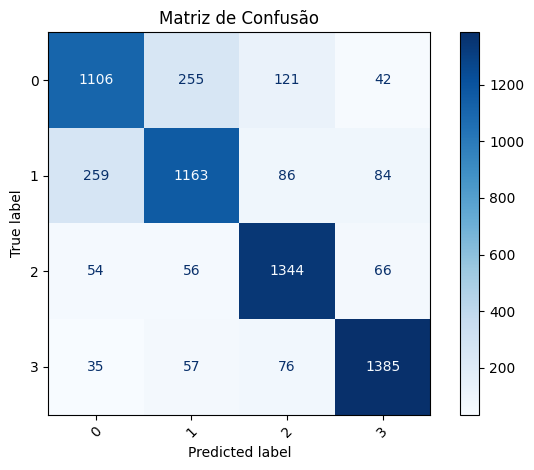

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Fazer previsões
y_pred = modelo.predict(X_test)

# 2. Relatório de classificação
print("📋 Relatório de Classificação:")
# Ensure the target names match the classes in the model
# Obter os nomes das classes originais a partir do LabelEncoder
target_names = label_encoders['DevType'].inverse_transform(np.unique(y))

# Exibir os nomes das classes  # Replace with actual class names if available
print(classification_report(y_test, y_pred, target_names=target_names))

# 3. Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
# Use only the classes present in y_test for display labels
unique_classes = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(xticks_rotation=45, cmap='Blues')

plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()


Trenando o Modelo para exportar usando o pickle

In [64]:
modelo.fit(X, y)

RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=200,
                       random_state=42)

In [65]:
import pickle
pickle.dump(modelo, open('RandomFlorest.sav', 'wb'))

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

parametros = {'activation':['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_train, y_train)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

{'activation': 'logistic', 'batch_size': 56, 'solver': 'sgd'}
0.8027065239345585


In [68]:
# Result of the grid search for the MLP
resultado_grid_search = {'activation': 'logistic', 'batch_size': 56, 'solver': 'sgd'}
melhor_resultado = 0.8035144415269644

print(f"Resultado do grid search para o MLP: {resultado_grid_search}")
print(f"Melhor resultado: {melhor_resultado}")

Resultado do grid search para o MLP: {'activation': 'logistic', 'batch_size': 56, 'solver': 'sgd'}
Melhor resultado: 0.8035144415269644
